# Predicción de enfermedades cardíacas

Vamos a analizar e intentar armar un modelo que nos permita clasificar a una persona con problemas cardíacos dependiendo distintos factores como la edad, sexo, presión arterial, etc...

Pueden encontrar mas detalles del dataset en: 
https://www.kaggle.com/ronitf/heart-disease-uci

In [1]:
#Importamos las librerias
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#Importamos los datos
df_heart = pd.read_csv("Dataset/heart.csv")

In [3]:
df_heart.shape

(303, 14)

Tenemos un conjunto de datos pequeño, veamos la consistencia

In [4]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df_heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No tenemos NaN en nuestro conjunto de datos

#### Realicemos un análisis básico de los datos

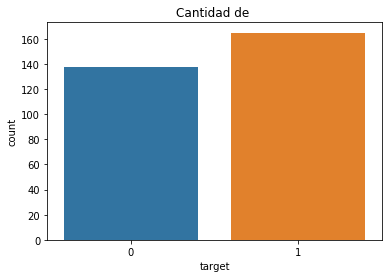

In [6]:
plt.figure(figsize=(6,4))
plt.title("Cantidad de ")
sns.countplot(df_heart['target'])

Tenemos una distribución equilibrada entre personas sanas (0) y personas con problemas cardíacos (1)

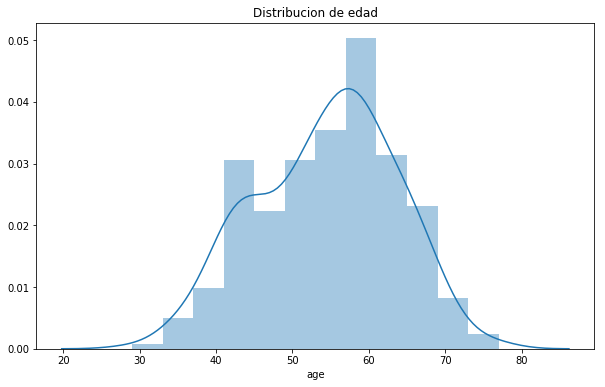

In [7]:
plt.figure(figsize=(10,6))
plt.title("Distribucion de edad")
sns.distplot(df_heart["age"])

Nuestro conjunto de datos se centra en personas de entre 40 a 70 años mayormente

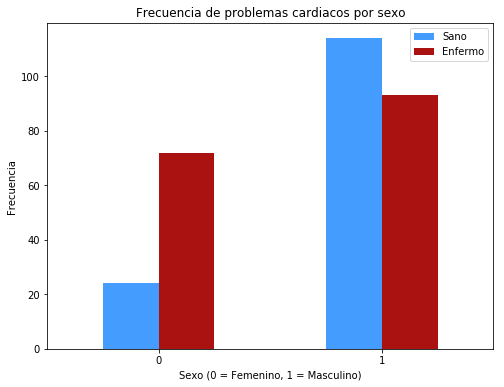

In [8]:
pd.crosstab(df_heart.sex,df_heart.target).plot(kind="bar",figsize=(8,6), color=['#459CFF','#AA1111' ])
plt.title('Frecuencia de problemas cardiacos por sexo')
plt.xlabel('Sexo (0 = Femenino, 1 = Masculino)')
plt.xticks(rotation=0)
plt.legend(["Sano", "Enfermo"])
plt.ylabel('Frecuencia')
plt.show()

Vemos la frecuencia de problemas cardíacos dividida entre pacientes Femeninos y Masculinos

Veamos que variables están mas correlacionadas con **target**

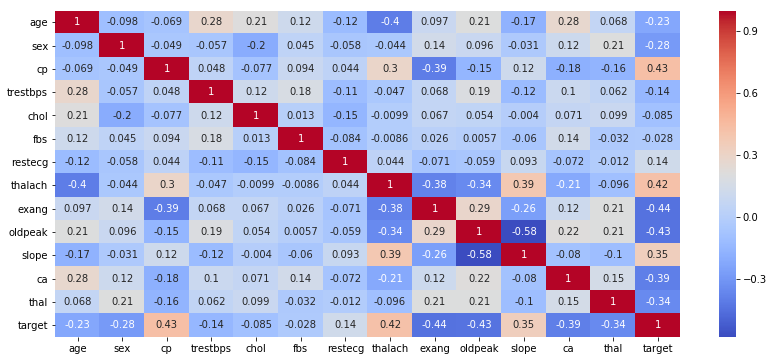

In [9]:
plt.figure(figsize=(14,6))
sns.heatmap(df_heart.corr(),cmap='coolwarm',annot=True)

Vemos que las 4 variables que tienen correlación positiva con nuestro objetivo son 4
- cp: Tipo de dolor en el pecho
- restecg: Resultados electrocardiográficos
- thalach: Frecuencia cardíaca máxima alcanzada
- slope: La pendiente del segmento pico del ejercicio ST

De todas formas vamos a tomar todo el conjunto de datos para el entrenamiento, pueden probar utilizando otras variables para ver como se comporta el modelo

Dividimos nuestros datos en **train** y **test**

In [10]:
X = df_heart.drop(['target'], axis=1)
y = df_heart['target']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Regresion Logistica

Ver hiperparametros del modelo: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [12]:
from sklearn.linear_model import LogisticRegression
clasif_RL = LogisticRegression(random_state = 12)
#Entrenamos el modelo
clasif_RL.fit(X_train, y_train)

/home/cbenitez/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=12, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
y_pred  = clasif_RL.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix
#Funcion para graficar la matriz de confusion
def confusion(ytest,y_pred):
    names=["Neg","Pos"]
    cm=confusion_matrix(ytest,y_pred)
    f,ax=plt.subplots(figsize=(6,6))
    sns.heatmap(cm,annot=True,linewidth=.5,fmt=".0f",ax=ax,cmap="Blues", annot_kws={"size": 14})
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

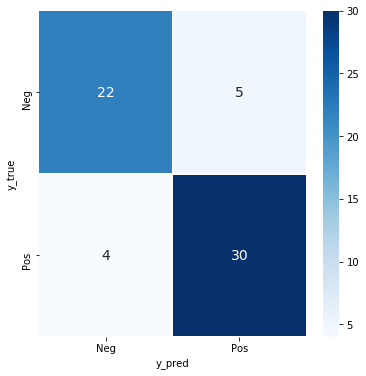

In [15]:
confusion(y_test,y_pred)

Veamos el area bajo la curva ROC

In [16]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [17]:
#Funcion para graficar la curva
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='r', label="ROC - AUC={:.3f}".format(roc_auc_score(y_test, y_pred)))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='-')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

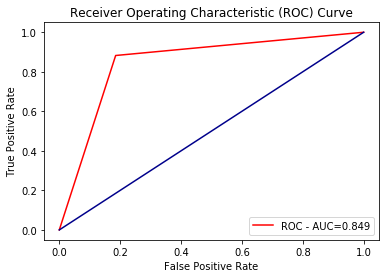

In [18]:
#Dividimos los datos en FalsePositive,TruePositive y un Treshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
#Los utilizamos para graficar el ROC-AUC
plot_roc_curve(fpr, tpr)

In [19]:
#Aplicamos la metrica de la curva ROC
print("ROC AUC score:", roc_auc_score(y_test, y_pred))

ROC AUC score: 0.8485838779956427


Vemos que el **score** de **84**, logramos un porcentaje muy bueno sin la necesidad de modificar los hiperparametros o realizar algún tipo de ajuste

## K-Nearest Neighbors (KNN)

Ver hiperparametros del modelo: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [20]:
from sklearn.neighbors import KNeighborsClassifier

clasif_knn = KNeighborsClassifier()
#Entrenamos el modelo
clasif_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [21]:
y_pred  = clasif_knn.predict(X_test)

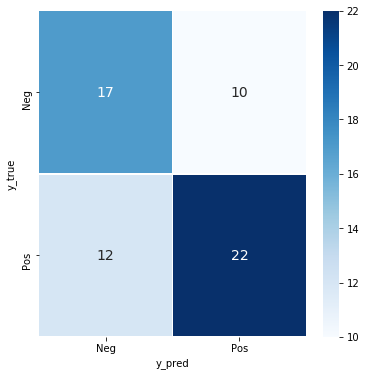

In [22]:
#Utilizamos la funcion nuevamente 
confusion(y_test,y_pred)

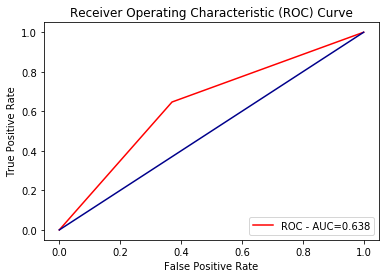

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)

In [24]:
print("ROC AUC score:", roc_auc_score(y_test, y_pred))

ROC AUC score: 0.6383442265795207


Vemos que con KNN no logramos un buen **score**, no es el modelo indicado para este conjunto de datos. Podemos intentar aplicar GridSearch para ver si mejora nuestro score

# Suport Vector Machine

Ver hiperparametros del modelo: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [25]:
from sklearn.svm import SVC

clasif_SVM = SVC(kernel = "linear", random_state = 0)
#Entrenamos el modelo
clasif_SVM.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [26]:
y_pred  = clasif_SVM.predict(X_test)

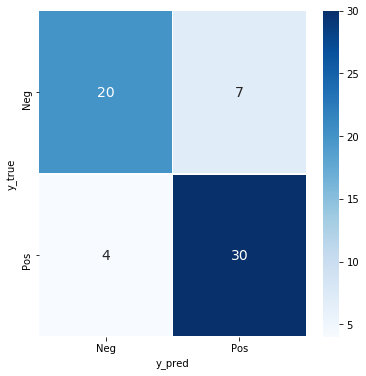

In [27]:
confusion(y_test,y_pred)

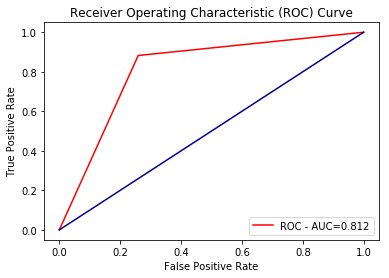

In [28]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)

In [29]:
print("ROC AUC score:", roc_auc_score(y_test, y_pred))

ROC AUC score: 0.8115468409586056


Con el hiperparametro **Kernel = "linear"**, el modelo se comporto bastante bien. Llegamos a un **score** de **81** 

# Árboles de decisión 

ver hiperparametros: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [30]:
from sklearn.tree import DecisionTreeClassifier
clasif_DT = DecisionTreeClassifier(random_state = 0)
#Entrenamos el modelo
clasif_DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [31]:
y_pred  = clasif_DT.predict(X_test)

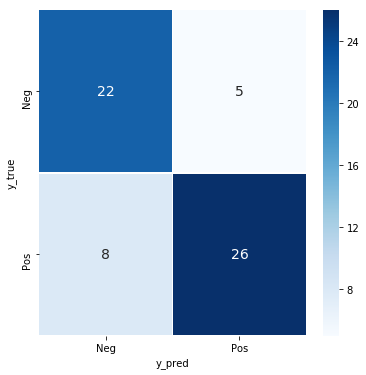

In [32]:
confusion(y_test,y_pred)

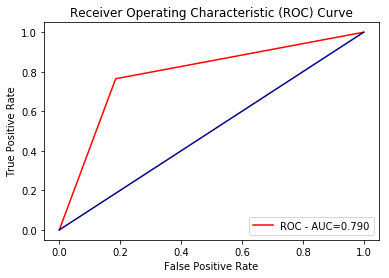

In [33]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)

In [34]:
print("ROC AUC score:", roc_auc_score(y_test, y_pred))

ROC AUC score: 0.789760348583878


Estos modelos sirven tanto para clasificación como para regresión, con los valores por defecto el árbol logro un **score** de **78**, si aplicamos GridSearch puede que lo podamos mejorar

# Random Forest

Ver hiperparametros: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [35]:
from sklearn.ensemble import RandomForestClassifier

clasif_RF = RandomForestClassifier(random_state = 0)
#Entrenamos el modelo
clasif_RF.fit(X_train, y_train)

/home/cbenitez/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [36]:
y_pred  = clasif_RF.predict(X_test)

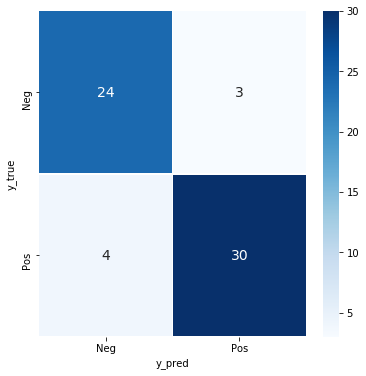

In [37]:
confusion(y_test,y_pred)

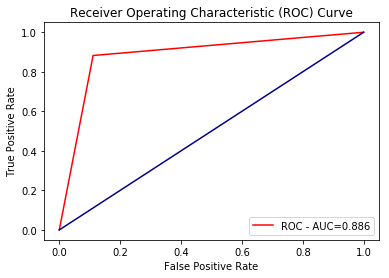

In [38]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)

In [39]:
print("ROC AUC score:", roc_auc_score(y_test, y_pred))

ROC AUC score: 0.8856209150326797


Vemos lo potente que es el modelo **Random Forest**, con solo utilizar los parametros por defecto logramos un **score** de **88**

# Optimizacion

### GridSearch

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
#Cargamos la grilla con los hiperparametros
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}

In [42]:
#Cargamos el modelo
clf_SVC = SVC(random_state=0)

grid_search = GridSearchCV(clf_SVC, param_grid, cv=5,
                           scoring='roc_auc', 
                           return_train_score=True,
                           n_jobs=-1)

In [43]:
grid_search.fit(X_train, y_train)

/home/cbenitez/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [1, 10, 100, 1000], 'gamma': [1, 0.1, 0.001, 0.0001], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [44]:
#Vemos los resultados del GridSearch
results = pd.DataFrame(grid_search.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.494945,0.285489,0.003985,0.000826,1,1,linear,"{'C': 1, 'gamma': 1, 'kernel': 'linear'}",0.856683,0.819930,...,0.891328,0.046440,5,0.935861,0.931086,0.922418,0.907009,0.918459,0.922967,0.010074
1,0.006643,0.001045,0.002772,0.000723,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.497585,0.500000,...,0.507476,0.010294,29,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.381206,0.257524,0.002100,0.000160,1,0.1,linear,"{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}",0.856683,0.819930,...,0.891328,0.046440,5,0.935861,0.931086,0.922418,0.907009,0.918459,0.922967,0.010074
3,0.004687,0.000190,0.002418,0.000117,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.584541,0.648601,...,0.619762,0.072728,28,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.423730,0.207952,0.002325,0.000536,1,0.001,linear,"{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}",0.856683,0.819930,...,0.891328,0.046440,5,0.935861,0.931086,0.922418,0.907009,0.918459,0.922967,0.010074


In [45]:
#Mejores parametros del modelo
grid_search.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'linear'}

In [46]:
print("El mejor score es:", grid_search.best_score_) 

El mejor score es: 0.8914259374194695


In [47]:
#Tomamos el mejor estimador
optimised_SVC = grid_search.best_estimator_

In [48]:
#Tomamos un ejemplo del conjunto de test
test_predict= X_test[60:61]
test_predict

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2


In [49]:
print("El paciente", list(test_predict.index),"Tiene un diagnostico:", optimised_SVC.predict(test_predict),"(Positivo: 1, Negativo: 0)")

El paciente [89] Tiene un diagnostico: [1] (Positivo: 1, Negativo: 0)
